<a href="https://colab.research.google.com/github/dinesh0110/PRODIGY_ML_01/blob/main/Prodigy_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task-02**

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
# Using kaggle api command for dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Folder unzip
!unzip '/content/customer-segmentation-tutorial-in-python.zip'

Archive:  /content/customer-segmentation-tutorial-in-python.zip
replace Mall_Customers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [26]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
#shape of dataframe
df.shape

(200, 5)

In [28]:
# handle missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [30]:
# Drop the CustomerID column
df = df.drop('CustomerID', axis=1)

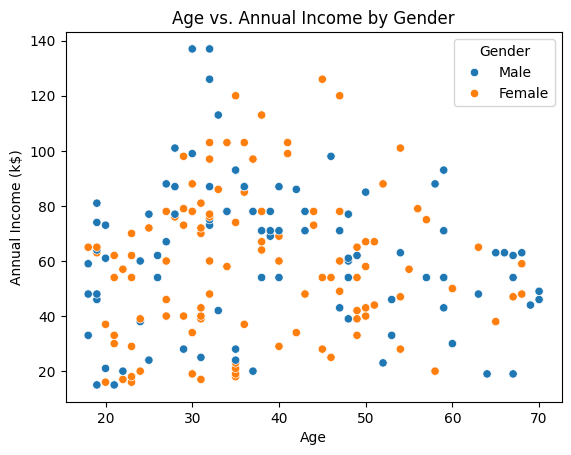

In [31]:
# Create a scatter plot of Age vs. Annual Income, colored by Gender
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df)

# Set the title and axis labels
plt.title('Age vs. Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# Show the plot
plt.show()


In [32]:
# Convert categorical variables to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [33]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


Model score: 0.025478181600745997


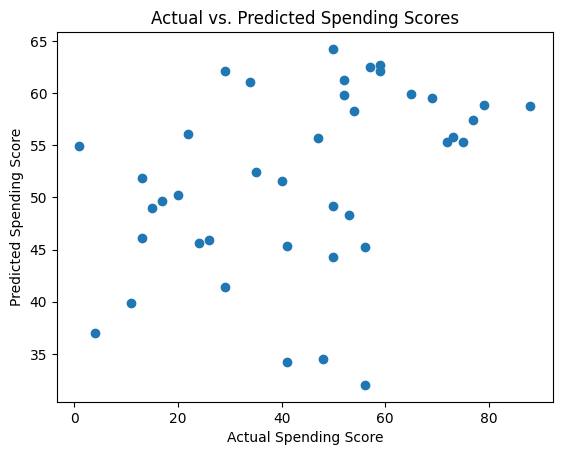

In [36]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df[['Age', 'Annual Income (k$)', 'Gender']]
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
print('Model score:', model.score(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs. predicted spending scores
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title('Actual vs. Predicted Spending Scores')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


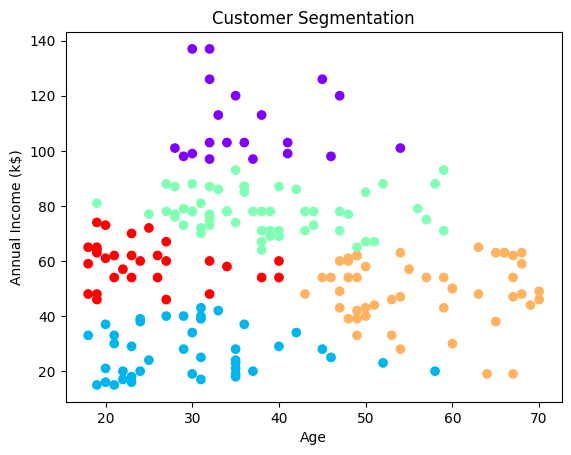

Cluster centers:
[[ 36.6        109.7          0.65      ]
 [ 30.21428571  27.07142857   0.66666667]
 [ 38.25423729  77.91525424   0.50847458]
 [ 56.59183673  49.06122449   0.51020408]
 [ 24.63333333  59.33333333   0.53333333]]
         Age  Annual Income (k$)    Gender
0  36.600000          109.700000  0.650000
1  30.214286           27.071429  0.666667
2  38.254237           77.915254  0.508475
3  56.591837           49.061224  0.510204
4  24.633333           59.333333  0.533333
         Age  Annual Income (k$)    Gender   Color
0  36.600000          109.700000  0.650000     red
1  30.214286           27.071429  0.666667    blue
2  38.254237           77.915254  0.508475   green
3  56.591837           49.061224  0.510204  yellow
4  24.633333           59.333333  0.533333    pink


In [41]:

# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Create a scatter plot of Age vs. Annual Income, colored by cluster
plt.scatter(X['Age'], X['Annual Income (k$)'], c=labels, cmap='rainbow')

# Set the title and axis labels
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# Show the plot
plt.show()

# Print the cluster centers
print('Cluster centers:')
print(kmeans.cluster_centers_)

# Create a DataFrame of the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Gender'])

# Print the DataFrame
print(cluster_centers)

# Create a dictionary of colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'pink'}

# Create a new column in the DataFrame called 'Color' and assign the corresponding color to each cluster
cluster_centers['Color'] = cluster_centers.index.map(colors)

# Print the DataFrame
print(cluster_centers)
